## Project 1 - Academic Journal Analysis in Web of Science
### Kristine Nolin and Carol Wittig

In [1]:
# Dependencies
import csv
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint

In [2]:
#load file from CSV
ur_pubs_old = pd.read_csv("UR_pubs.csv", low_memory=False)
ur_pubs_old.head()

#Convert the Publication Year to an Integer without a decimal float
ur_pubs_old["Publication Year"] = ur_pubs_old["Publication Year"].fillna(0.0).astype(int)

ur_pubs_old


,Authors,Title,Journal Title,Volume,Issue,Beginning Page,Ending Page,DOI,Publication Date,Publication Year,...,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,Unnamed: 319
0,"Mago, Shakun D.; Sheremeta, Roman M.",New Hampshire Effect: behavior in sequential a...,EXPERIMENTAL ECONOMICS,22,2,325,349,10.1007/s10683-018-9569-0,19-Jun,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Kotler, Philip; Manrai, Lalita A.; Lascu, Dana...",Influence of country and company characteristi...,INTERNATIONAL BUSINESS REVIEW,28,3,482,498,10.1016/j.ibusrev.2018.11.006,19-Jun,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Joshi, Piyush; Darr, Andrew J.; Skromne, Isaac",CDX4 regulates the progression of neural matur...,DEVELOPMENTAL BIOLOGY,449,2,132,142,10.1016/j.ydbio.2019.02.014,MAY 15 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Park, Hyejin; McEachon, Joseph D., II; Pollock...",Synthesis and characterization of hydrogen per...,BIOORGANIC & MEDICINAL CHEMISTRY,27,10,2075,2082,10.1016/j.bmc.2019.04.003,MAY 15 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Duer, M.; Schmidt, A.; Pybus, J. R.; Segarra, ...",Direct Observation of Proton-Neutron Short-Ran...,PHYSICAL REVIEW LETTERS,122,17,NaN,NaN,10.1103/PhysRevLett.122.172502,MAY 3 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Burnette, Jeni L.; Forsyth, Rachel B.; Desmara...",MINDSETS OF ADDICTION: IMPLICATIONS FOR TREATM...,JOURNAL OF SOCIAL AND CLINICAL PSYCHOLOGY,38,5,367,394,10.1521/jscp.2019.38.5.367,19-May,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Roy, P.; Park, S.; Crede, V.; Anisovich, A. V....",First Measurements of the Double-Polarization ...,PHYSICAL REVIEW LETTERS,122,16,NaN,NaN,10.1103/PhysRevLett.122.162301,APR 23 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Kentner, Amanda C.; Lambert, Kelly G.; Hannan,...",Editorial: Environmental Enrichment: Enhancing...,FRONTIERS IN BEHAVIORAL NEUROSCIENCE,13,NaN,NaN,NaN,10.3389/fnbeh.2019.00075,APR 16 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Aldana, Elis; Otalora-Luna, Fernando","Artistic Notion of Mimicry, a Case Study: Does...",BIOSEMIOTICS,12,1,157,174,10.1007/s12304-019-09351-1,19-Apr,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Meyer, Manuella",MADHOUSE: PSYCHIATRY AND POLITICS IN CUBAN HIS...,JOURNAL OF THE HISTORY OF THE BEHAVIORAL SCIENCES,55,2,167,169,10.1002/jhbs.21968,19-Apr,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Deleted unnecessary columns

ur_pubs = ur_pubs_old[["Author 1", "Author 2", "Author 3", "Author 4", "Author 5", "Title", "Journal Title", "Volume", "Issue", "DOI", "Publication Date", "Publication Year"]]

ur_pubs.head()
#ur_pubs.count()

,Author 1,Author 2,Author 3,Author 4,Author 5,Title,Journal Title,Volume,Issue,DOI,Publication Date,Publication Year
0,"Mago, S.","Sheremeta, R.",",.",",.",",.",New Hampshire Effect: behavior in sequential a...,EXPERIMENTAL ECONOMICS,22,2,10.1007/s10683-018-9569-0,19-Jun,2019
1,"Kotler, P.","Manrai, L.","Lascu, D.","Manrai, A.",",.",Influence of country and company characteristi...,INTERNATIONAL BUSINESS REVIEW,28,3,10.1016/j.ibusrev.2018.11.006,19-Jun,2019
2,"Joshi, P.","Darr, A.","Skromne, I.",",.",",.",CDX4 regulates the progression of neural matur...,DEVELOPMENTAL BIOLOGY,449,2,10.1016/j.ydbio.2019.02.014,MAY 15 2019,2019
3,"Park, H.","Mceachon, J.","Pollock, J.",",.",",.",Synthesis and characterization of hydrogen per...,BIOORGANIC & MEDICINAL CHEMISTRY,27,10,10.1016/j.bmc.2019.04.003,MAY 15 2019,2019
4,"Duer, M.","Schmidt, A.","Pybus, J.","Segarra, E.","Hrnjic, A.",Direct Observation of Proton-Neutron Short-Ran...,PHYSICAL REVIEW LETTERS,122,17,10.1103/PhysRevLett.122.172502,MAY 3 2019,2019


In [4]:
#Grouped journals by title

journal_grouping = ur_pubs.groupby(['Journal Title'])
journal_grouping.count()
joe = journal_grouping.count()
joe.head()

,Author 1,Author 2,Author 3,Author 4,Author 5,Title,Volume,Issue,DOI,Publication Date,Publication Year
Journal Title,,,,,,,,,,,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2,2,2,2,2,2,2,2,2,2,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188,188,188,188,188,188,188,9,0,188,188
ACADEMIC THERAPY,1,1,1,1,1,1,1,1,1,1,1
ACADEMY OF MANAGEMENT ANNALS,1,1,1,1,1,1,1,0,1,1,1
ACADEMY OF MANAGEMENT EXECUTIVE,2,2,2,2,2,2,2,2,2,2,2


In [5]:
#Grouped by Journal title -- and counted the individual publications within each journal

journal_grouping = ur_pubs.groupby(['Journal Title']).count()[["Title"]]

journal_grouping.head()

,Title
Journal Title,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
ACADEMIC THERAPY,1
ACADEMY OF MANAGEMENT ANNALS,1
ACADEMY OF MANAGEMENT EXECUTIVE,2


## Bar Graph and Pie Chart for Journal Count Top 10

In [6]:
##Bar Graph for Journal Count - ALL -- way too big (saved as BAD Graph by comparison)

# journal_grouping = journal_grouping.plot(kind="bar", title="Count of Journals by Title")
# journal_grouping.set_xlabel("Journal Title")
# journal_grouping.set_ylabel("Count by Title")

# plt.savefig("Bad_Graphs_Count-Journals-Title.png")
# #plt.show()

In [7]:
#Rename Columns
journal_grouping = journal_grouping.rename(columns={"Title":"Count by Title"})
journal_grouping.head()

,Count by Title
Journal Title,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
ACADEMIC THERAPY,1
ACADEMY OF MANAGEMENT ANNALS,1
ACADEMY OF MANAGEMENT EXECUTIVE,2


In [8]:
#Sort journals by title - count and sort alphabetically
journal_sort = journal_grouping.sort_values(["Count by Title"], ascending=False)
top_journal_grouping = journal_sort.nlargest(10, ["Count by Title"], keep="first")
top_journal_grouping

,Count by Title
Journal Title,
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
PHYSICAL REVIEW C,145
FASEB JOURNAL,136
LIBRARY JOURNAL,70
PHYSICAL REVIEW LETTERS,60
AMERICAN HISTORICAL REVIEW,36
JOURNAL OF AMERICAN HISTORY,34
PERCEPTUAL AND MOTOR SKILLS,32
WILLIAM AND MARY QUARTERLY,31


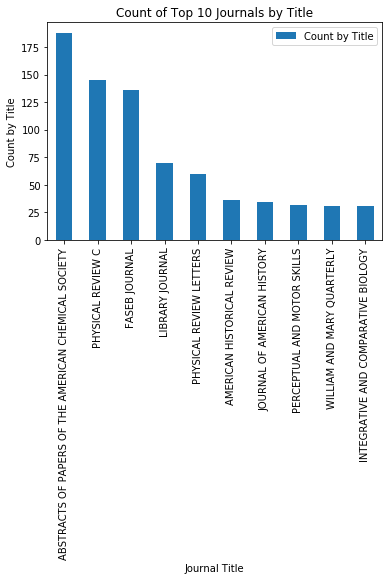

<Figure size 432x288 with 0 Axes>

In [9]:
##Bar Graph for Journal Count - ALL -- way too big (saved as BAD Graph by comparison)

top_journal_grouping = top_journal_grouping.plot(kind="bar", title="Count of Top 10 Journals by Title")
top_journal_grouping.set_xlabel("Journal Title")
top_journal_grouping.set_ylabel("Count by Title")


plt.savefig("Count-Journals-Title.png", bbox_inches = "tight")
plt.show()
plt.tight_layout()

In [10]:
#Sorted Journal Titles by # of publications - Highest to Lowest

journal_sort = journal_grouping.sort_values(["Count by Title"], ascending=False)
top_journal_sort=journal_sort.nlargest(10, ['Count by Title'], keep="first")
top_journal_sort

,Count by Title
Journal Title,
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
PHYSICAL REVIEW C,145
FASEB JOURNAL,136
LIBRARY JOURNAL,70
PHYSICAL REVIEW LETTERS,60
AMERICAN HISTORICAL REVIEW,36
JOURNAL OF AMERICAN HISTORY,34
PERCEPTUAL AND MOTOR SKILLS,32
WILLIAM AND MARY QUARTERLY,31


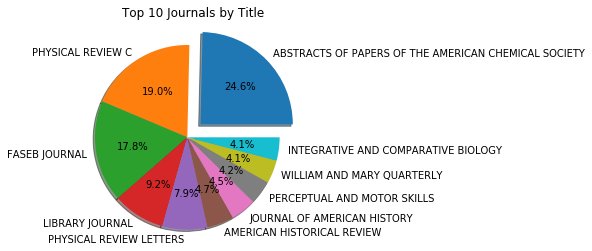

In [11]:
# labels=top_journal_sort["Journal Title"]
labels=top_journal_sort.index.values
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(top_journal_sort["Count by Title"],labels=labels, explode = explode, shadow = True, startangle = 0, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Top 10 Journals by Title")

# Save Figure
plt.savefig("Top 10 Journals By Title.png", bbox_inches = "tight")
plt.show()

## Total Publications per Year
### Line Graph and Horizontal Bar Graph (# of titles - x axis; pub year - y axis

In [12]:
#Identified TOTAL publications per year

yearly_publications = ur_pubs.groupby(["Publication Year"]).count()[["Title"]]
cleaned_yearly_publications = yearly_publications.drop([0])
cleaned_yearly_publications.head()


,Title
Publication Year,
1976,20
1977,20
1978,37
1979,34
1980,48


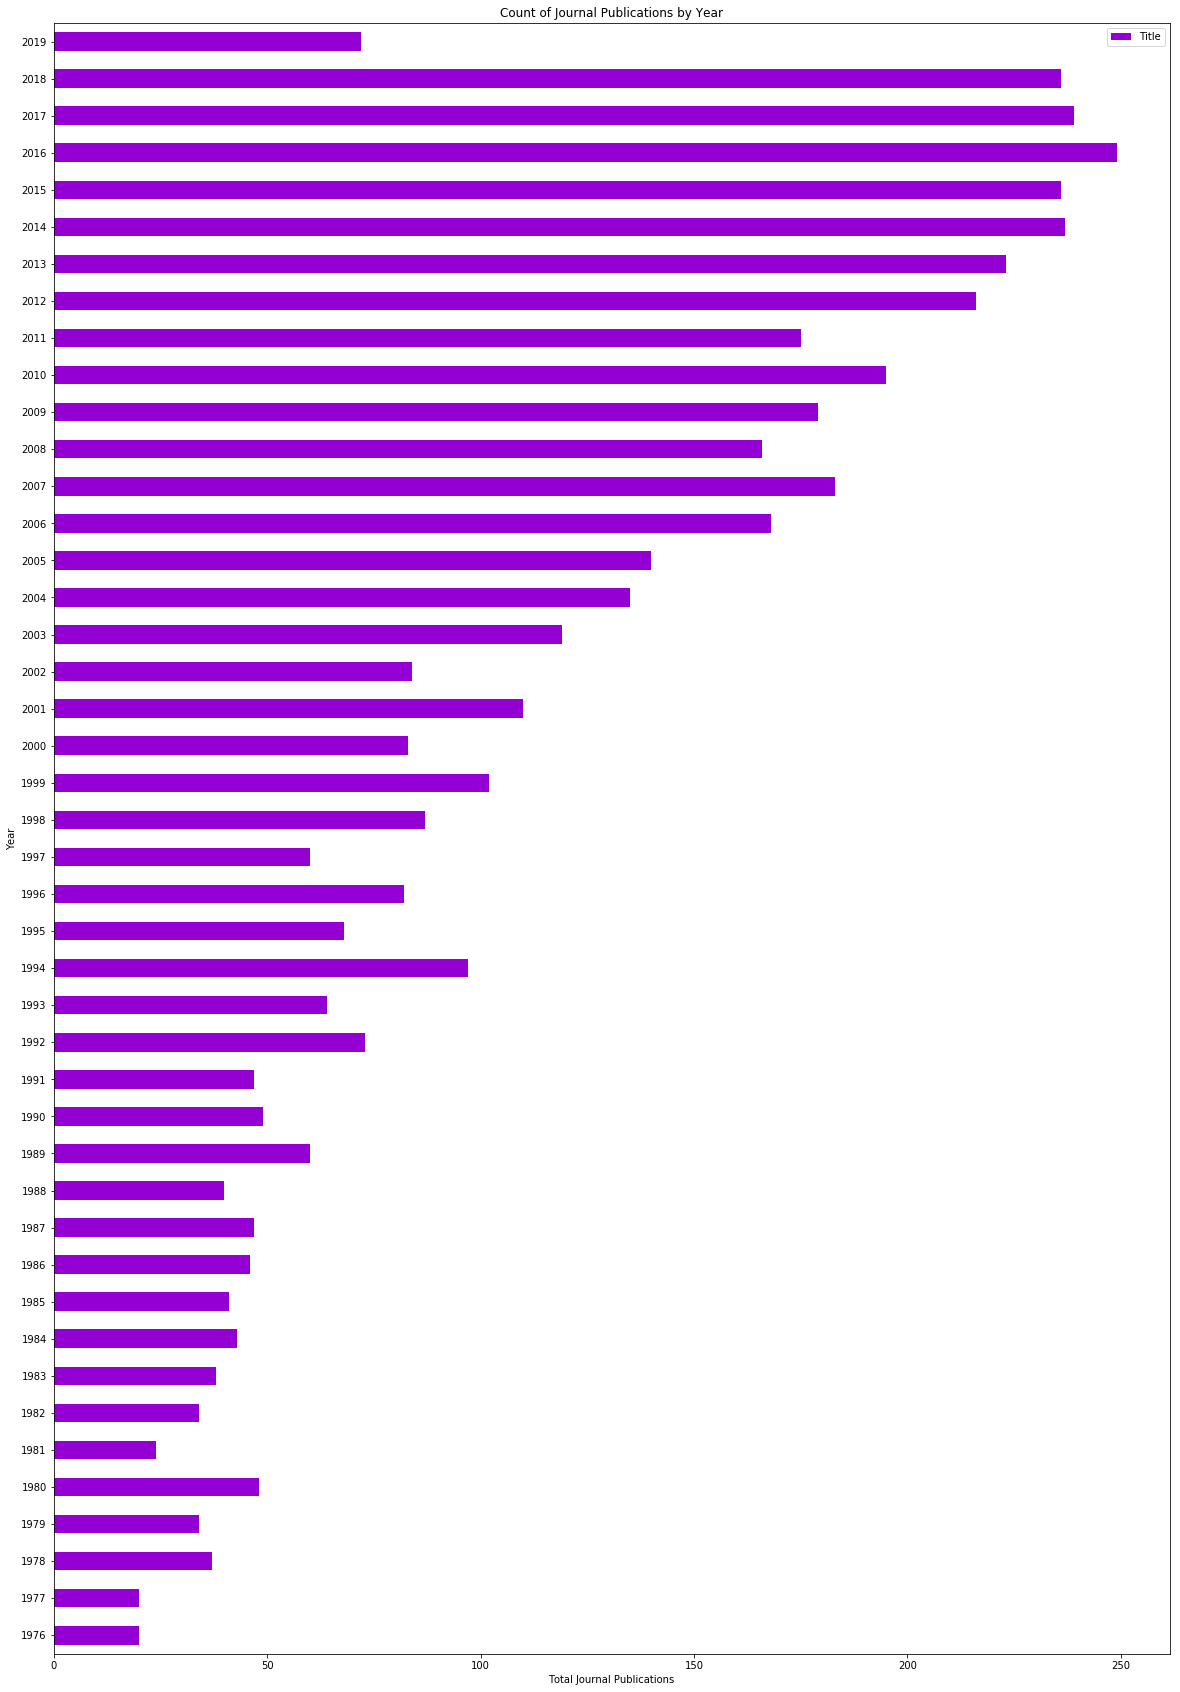

In [13]:
##Horizontal Bar Graph - Journal Totals by Publication Year

cleaned_yearly_publications = cleaned_yearly_publications.plot(kind="barh", color="darkviolet", title="Count of Journal Publications by Year", figsize=(20, 30))
cleaned_yearly_publications.set_xlabel("Total Journal Publications")
cleaned_yearly_publications.set_ylabel("Year")


plt.savefig("Count-Journals-by-YEAR.png")
plt.show()




<function matplotlib.pyplot.show(*args, **kw)>

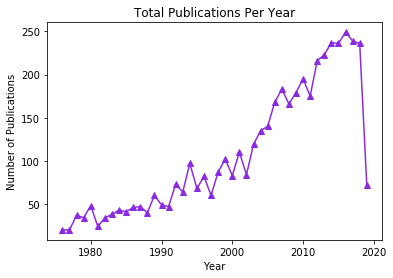

In [14]:
#Identified and plotted TOTAL publications per year

yearly_publications = ur_pubs.groupby(["Publication Year"]).count()[["Title"]]
cleaned_yearly_publications=yearly_publications.drop([0])
clean_yearly_pubs=cleaned_yearly_publications.drop([2019])

plt.plot(cleaned_yearly_publications, marker = "^", c="blueviolet")
plt.title("Total Publications Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.savefig("Total Publications Per Year.png", bbox_inches = "tight")
plt.show

## Publications Per Journal / Per Year

In [51]:
#Identified and sorted publications per journal per year

yearly_publications = ur_pubs.groupby(["Publication Year", "Journal Title"]).count()[["Title"]]
yearly_publications.head()

Title
Publication Year Journal Title                         
1976             AMERICAN MATHEMATICAL MONTHLY        1
                 COPEIA                               1
                 ELH-ENGLISH LITERARY HISTORY         1
                 FEDERATION PROCEEDINGS               1
                 JOURNAL OF EXPERIMENTAL ZOOLOGY      2

## Author Information - Publications
### Sort Top Authors by Number of Publications

In [16]:
#Uses original dataframe UR_pubs and identifies first authors and counts # of publications

first_v1=pd.DataFrame(ur_pubs['Author 1'].value_counts())
first_v1.index.names = ['Author']
first_v2 = first_v1.rename(columns={"Author 1":"Publications"})
first_v2.head()

,Publications
Author,
"Maxwell, L.",66
"Seeman, J.",50
"Daniel, W.",32
"Gunlicks, A.",31
"Summers, C.",30


In [17]:
#Reset Index for each author - allows for merging 
first=first_v2.reset_index()
first.head(10)

,Author,Publications
0,"Maxwell, L.",66
1,"Seeman, J.",50
2,"Daniel, W.",32
3,"Gunlicks, A.",31
4,"Summers, C.",30
5,"Topham, R.",30
6,"Davis, J.",29
7,"Kenzer, R.",27
8,"Brandenberger, D.",27
9,"Howell, Y.",27


In [18]:
#Uses original dataframe UR_pubs and identifies second authors and counts # of publications
second_v1 =pd.DataFrame(ur_pubs['Author 2'].value_counts())
second_v1.index.names = ['Author']
second_v2 = second_v1.rename(columns={"Author 2":"Publications (2)"})

In [19]:
#Reset Index for each author - allows for merging 
second=second_v2.reset_index()
second.head(5)

,Author,Publications (2)
0,",.",2107
1,"Bell, E.",54
2,"Parish, C.",35
3,"Allison, S.",17
4,"De Sa, R.",14


In [20]:
#Uses original dataframe UR_pubs and identifies third authors and counts # of publications
third_v1 = pd.DataFrame(ur_pubs['Author 3'].value_counts())
third_v1.index.names = ['Author']
third_v2 = third_v1.rename(columns={"Author 3":"Publications (3)"})

In [21]:
#Reset Index for each author - allows for merging 
third=third_v2.reset_index()
third.head()

,Author,Publications (3)
0,",.",2866
1,"Leopold, M.",15
2,"Myers, W.",14
3,"Parish, C.",14
4,"Ross, W.",14


In [22]:
#Uses original dataframe UR_pubs and identifies fourth authors and counts # of publications
fourth_v1 = pd.DataFrame(ur_pubs['Author 4'].value_counts())
fourth_v1.index.names = ['Author']
fourth_v2 = fourth_v1.rename(columns={"Author 4":"Publications (4)"})

In [23]:
#Reset Index for each author - allows for merging 
fourth=fourth_v2.reset_index()
fourth.head()

,Author,Publications (4)
0,",.",3424
1,"Myers, W.",13
2,"Harman, W.",12
3,"Bell, E.",11
4,"Quintero, O.",10


In [24]:
#Uses original dataframe UR_pubs and identifies fifth authors and counts # of publications
fifth_v1 = pd.DataFrame(ur_pubs['Author 5'].value_counts())
fifth_v1.index.names = ['Author']
fifth_v2 = fifth_v1.rename(columns={"Author 5":"Publications (5)"})

In [25]:
#Reset Index for each author - allows for merging 
fifth=fifth_v2.reset_index()
fifth.head()

,Author,Publications (5)
0,",.",3887
1,"Adams, G.",14
2,"Sabat, M.",11
3,"Harman, W.",11
4,"Adhikari, K.",11


In [26]:
#Merging 2nd and 3rd author dataframes

merge_table1 = pd.merge(second, third, on="Author", how="outer")
# merge_table1_v2 = merge_table1.groupby(["Author"], as_index = False)
merge_table1.head(2)

,Author,Publications (2),Publications (3)
0,",.",2107.0,2866.0
1,"Bell, E.",54.0,11.0


In [27]:
#Merging 1st author with new dataframe

merge_table2= pd.merge(merge_table1, first, on="Author", how="outer")
merge_table2.head(10)

,Author,Publications (2),Publications (3),Publications
0,",.",2107.0,2866.0,NaN
1,"Bell, E.",54.0,11.0,23.0
2,"Parish, C.",35.0,14.0,7.0
3,"Allison, S.",17.0,4.0,19.0
4,"De Sa, R.",14.0,13.0,9.0
5,"Yates, A.",12.0,1.0,3.0
6,"Ross, W.",12.0,14.0,7.0
7,"Kukar-Kinney, M.",11.0,2.0,11.0
8,"Beausang, C.",11.0,5.0,4.0
9,"Burkert, V.",11.0,13.0,NaN


In [28]:
#Merging 4th author with new dataframe
merge_table3 = pd.merge(merge_table2, fourth, on="Author", how="outer")
merge_table3.head(10)

,Author,Publications (2),Publications (3),Publications,Publications (4)
0,",.",2107.0,2866.0,NaN,3424.0
1,"Bell, E.",54.0,11.0,23.0,11.0
2,"Parish, C.",35.0,14.0,7.0,8.0
3,"Allison, S.",17.0,4.0,19.0,3.0
4,"De Sa, R.",14.0,13.0,9.0,6.0
5,"Yates, A.",12.0,1.0,3.0,NaN
6,"Ross, W.",12.0,14.0,7.0,2.0
7,"Kukar-Kinney, M.",11.0,2.0,11.0,NaN
8,"Beausang, C.",11.0,5.0,4.0,2.0
9,"Burkert, V.",11.0,13.0,NaN,4.0


In [29]:
#Merging 5th author with new dataframe - and adds in total publications by adding author rows
#,.0 row field - is all publications with only a single author -- ability to pull this total off for
# subsequent dataframes
merge_table4 = pd.merge(merge_table3, fifth, on="Author", how="outer")
merge_table4["Total Author Publications"] = merge_table4.sum(axis=1)
merge_table4.head(10)

,Author,Publications (2),Publications (3),Publications,Publications (4),Publications (5),Total Author Publications
0,",.",2107.0,2866.0,NaN,3424.0,3887.0,12284.0
1,"Bell, E.",54.0,11.0,23.0,11.0,4.0,103.0
2,"Parish, C.",35.0,14.0,7.0,8.0,6.0,70.0
3,"Allison, S.",17.0,4.0,19.0,3.0,NaN,43.0
4,"De Sa, R.",14.0,13.0,9.0,6.0,7.0,49.0
5,"Yates, A.",12.0,1.0,3.0,NaN,NaN,16.0
6,"Ross, W.",12.0,14.0,7.0,2.0,2.0,37.0
7,"Kukar-Kinney, M.",11.0,2.0,11.0,NaN,NaN,24.0
8,"Beausang, C.",11.0,5.0,4.0,2.0,3.0,25.0
9,"Burkert, V.",11.0,13.0,NaN,4.0,NaN,28.0


In [30]:
#Sorts the totals in descending order of publications -- adds 0 for when null values
merge_tables_sort = merge_table4.sort_values(["Total Author Publications"], ascending=False)
merge_tables_zero=merge_tables_sort.where(merge_tables_sort.isnull() == False,0)
merge_tables_zero.head(3)

,Author,Publications (2),Publications (3),Publications,Publications (4),Publications (5),Total Author Publications
0,",.",2107.0,2866.0,0.0,3424.0,3887.0,12284.0
1,"Bell, E.",54.0,11.0,23.0,11.0,4.0,103.0
2,"Parish, C.",35.0,14.0,7.0,8.0,6.0,70.0


In [31]:
# Resets the index for the new merged dataframe 
total_merge_v1 = merge_tables_zero.set_index("Author")

In [32]:
# Removed null fields - the ,. totals to get rid of all empty author fields
total_merge = total_merge_v1.drop(index=',.')
total_merge = total_merge[["Publications", "Publications (2)", "Publications (3)", "Publications (4)", "Publications (5)", "Total Author Publications"]]
total_merge.head(5)


,Publications,Publications (2),Publications (3),Publications (4),Publications (5),Total Author Publications
Author,,,,,,
"Bell, E.",23.0,54.0,11.0,11.0,4.0,103.0
"Parish, C.",7.0,35.0,14.0,8.0,6.0,70.0
"Maxwell, L.",66.0,0.0,0.0,0.0,0.0,66.0
"Seeman, J.",50.0,2.0,0.0,0.0,0.0,52.0
"De Sa, R.",9.0,14.0,13.0,6.0,7.0,49.0


In [33]:
# Narrow to top 10 authors for plotting
total_merge_10=total_merge.nlargest(10, ['Total Author Publications'], keep="first")
total_merge_10.head(5)

,Publications,Publications (2),Publications (3),Publications (4),Publications (5),Total Author Publications
Author,,,,,,
"Bell, E.",23.0,54.0,11.0,11.0,4.0,103.0
"Parish, C.",7.0,35.0,14.0,8.0,6.0,70.0
"Maxwell, L.",66.0,0.0,0.0,0.0,0.0,66.0
"Seeman, J.",50.0,2.0,0.0,0.0,0.0,52.0
"De Sa, R.",9.0,14.0,13.0,6.0,7.0,49.0


### Determining the top first authors

In [34]:
#Narrowed list of top 1st authors to top 10 and created new dataframe
first10=first.nlargest(10, ['Publications'], keep="first")
first10=first10.set_index("Author")
first10

,Publications
Author,
"Maxwell, L.",66
"Seeman, J.",50
"Daniel, W.",32
"Gunlicks, A.",31
"Summers, C.",30
"Topham, R.",30
"Davis, J.",29
"Kenzer, R.",27
"Brandenberger, D.",27


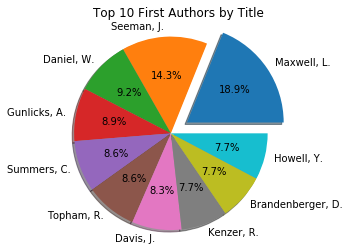

In [35]:
# Top 10 First Author at UR
labels=first10.index.values 
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(first10["Publications"],labels=labels, explode=explode,shadow = True, startangle = 0, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Top 10 First Authors by Title")

# Save Figure
plt.savefig("Top 10 First Authors by Title.png", bbox_inches = "tight")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

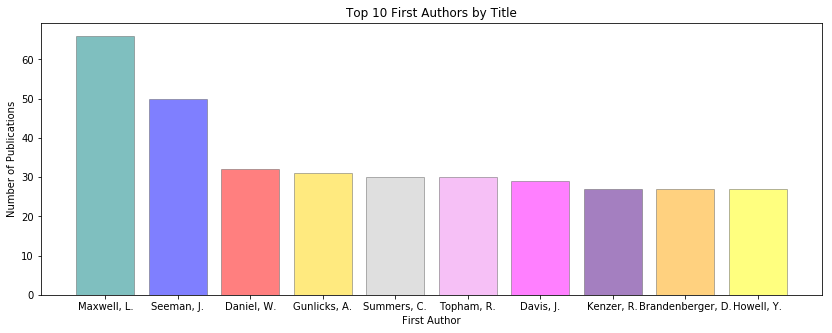

In [36]:
# google inline plot to get rcParams
plt.rcParams["figure.figsize"]=[14,5]
x_axis = first10.index
y_axis = first10["Publications"]
plt.bar(x_axis, y_axis, alpha=0.5, color = ("teal", "blue", "red", "gold", "silver", "violet", "magenta", "indigo", "orange", "yellow"), edgecolor='dimgrey',align="center")
plt.title("Top 10 First Authors by Title")
plt.xlabel("First Author")
plt.ylabel("Number of Publications")
plt.savefig("Bar Top 10 First Authors by Title.png", bbox_inches = "tight")
plt.show

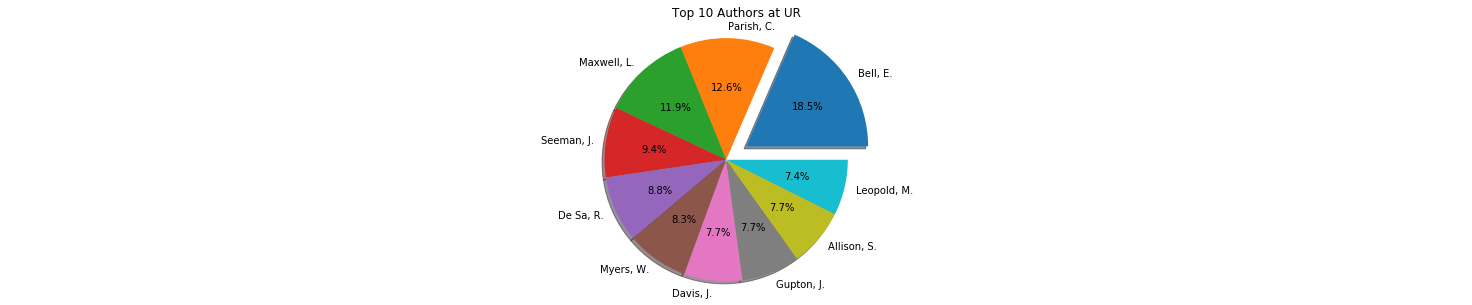

In [52]:
# Top 10 UR Authors in Database

labels=total_merge_10.index.values
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(total_merge_10["Total Author Publications"],labels=labels, explode = explode, shadow = True, startangle = 0, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Top 10 Authors at UR")

# Save Figure
plt.savefig("Top 10 Authors at UR.png", bbox_inches = "tight")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

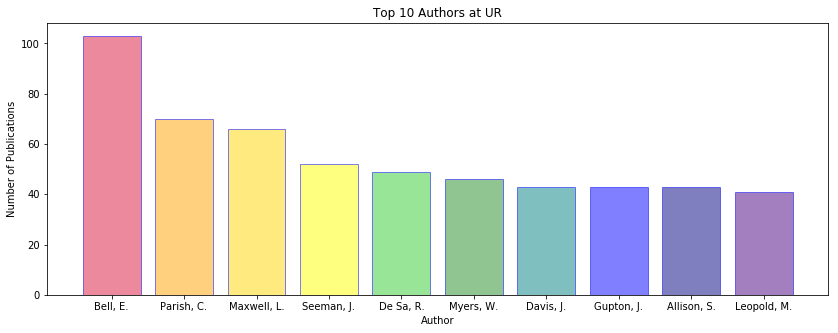

In [38]:
# Plots top 10 authors in a bar graph - following ROYGB coloring scheme --the spectroscopic series
plt.rcParams["figure.figsize"]=[14,5]
x_axis = total_merge_10.index
y_axis = total_merge_10["Total Author Publications"]
plt.label = total_merge_10["Total Author Publications"]
plt.bar(x_axis, y_axis, alpha=0.5, color = ("crimson", "orange", "gold", "yellow", "limegreen", "forestgreen", "teal", "blue", "navy", "indigo"), align="center", edgecolor='blue')
plt.title("Top 10 Authors at UR")
plt.xlabel("Author")
plt.ylabel("Number of Publications")
plt.savefig("Bar Top 10 Author at UR.png", bbox_inches = "tight")
plt.show

### This is a new spreadsheet to read in and merge that identifies faculty by department

In [39]:
# Reading in the UR faculty database
ur_faculty_1 = pd.read_csv("UR_faculty.csv")
ur_faculty_1.head()

,University ID,"Employee Last Name, First Name",Organization,Organization Description,Appointment Begin Date,Faculty Last,First Initial,First,Faculty Name,Appointment Year,Appointment Month
0,53597010,"Rubenstein, Ephraim",6171,Art and Art History,08/01/1987,Rubenstein,E,Ephraim,"Rubenstein, E.",1987,8
1,72683617,"Johnson, Charles",6171,Art and Art History,08/01/1967,Johnson,C,Charles,"Johnson, C.",1967,8
2,77306857,"Denton, Margaret",6171,Art and Art History,08/01/1990,Denton,M,Margaret,"Denton, M.",1990,8
3,97529929,"Rhodes, D.",6171,Art and Art History,08/01/1987,Rhodes,D,D.,"Rhodes, D.",1987,8
4,40703546,"Hayden, W.",6181,Biology,08/01/1980,Hayden,W,W.,"Hayden, W.",1980,8


In [40]:
# Reorganizing and condensing faculty dataframe
ur_faculty_2 = ur_faculty_1[["Faculty Name", "Organization Description", "Appointment Year"]]
ur_faculty_3 = ur_faculty_2.rename(columns={"Faculty Name":"Author"})
ur_faculty_3.head(5)

,Author,Organization Description,Appointment Year
0,"Rubenstein, E.",Art and Art History,1987
1,"Johnson, C.",Art and Art History,1967
2,"Denton, M.",Art and Art History,1990
3,"Rhodes, D.",Art and Art History,1987
4,"Hayden, W.",Biology,1980


In [41]:
# Merging the dataframes of authors with department information - adds in first author publication totals
faculty_table1 = pd.merge(first, ur_faculty_3, on="Author", how="outer")
faculty_table1["Appointment Year"] = faculty_table1["Appointment Year"].fillna(0.0).astype(int)
faculty_table1.head(10)

,Author,Publications,Organization Description,Appointment Year
0,"Maxwell, L.",66.0,NaN,0
1,"Seeman, J.",50.0,NaN,0
2,"Daniel, W.",32.0,NaN,0
3,"Gunlicks, A.",31.0,Political Science,1968
4,"Summers, C.",30.0,History,1991
5,"Topham, R.",30.0,Chemistry,1971
6,"Davis, J.",29.0,Math & Computer Sciences,1988
7,"Kenzer, R.",27.0,History,1993
8,"Brandenberger, D.",27.0,History,2002
9,"Howell, Y.",27.0,"Languages, Literatures,and Cultures",1991


In [42]:
# Count of publications per departments by first authors only 
department_publications = faculty_table1.groupby(["Organization Description"]).sum()[["Publications"]]
department_publications.head(3)

,Publications
Organization Description,
Accounting,17.0
Art Center,0.0
Art and Art History,16.0


In [43]:
#Limits to top 10 departments for publication totals by faculty
department10=department_publications.nlargest(10, ['Publications'], keep="first")
department10

,Publications
Organization Description,
History,193.0
Jepson School - Instruction,181.0
Chemistry,180.0
English,171.0
Law School - Instruction,161.0
Psychology,150.0
Math & Computer Sciences,133.0
"Languages, Literatures,and Cultures",132.0
Biology,130.0


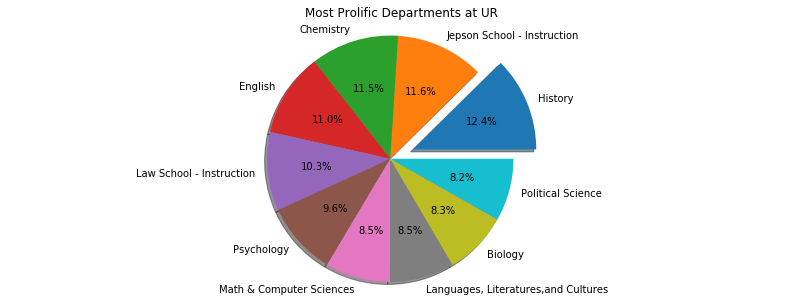

In [44]:
#Plots information on a pie chart for top departments by first author publications
labels=department10.index.values
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(department10["Publications"],labels=labels, explode = explode, shadow = True, startangle = 0, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Most Prolific Departments at UR")

# Save Figure
plt.savefig("Most Prolific Departments at UR.png", bbox_inches = "tight")
plt.show()

## Examine the total publications of faculty listed as the first-fifth author.

In [45]:
#Resets the index 
total_pubs=total_merge.reset_index()
# Totals for merged datasets on publications - all listings with or without departments
total_pubs.head(3)

,Author,Publications,Publications (2),Publications (3),Publications (4),Publications (5),Total Author Publications
0,"Bell, E.",23.0,54.0,11.0,11.0,4.0,103.0
1,"Parish, C.",7.0,35.0,14.0,8.0,6.0,70.0
2,"Maxwell, L.",66.0,0.0,0.0,0.0,0.0,66.0


In [46]:
#Merges the total publication dataframe with the faculty dataframe
faculty_table2 = pd.merge(total_pubs, ur_faculty_3, on="Author", how="left")
faculty_table2["Appointment Year"] = faculty_table2["Appointment Year"].fillna(0.0).astype(int)
faculty_table2.head(5)

,Author,Publications,Publications (2),Publications (3),Publications (4),Publications (5),Total Author Publications,Organization Description,Appointment Year
0,"Bell, E.",23.0,54.0,11.0,11.0,4.0,103.0,Chemistry,2001
1,"Parish, C.",7.0,35.0,14.0,8.0,6.0,70.0,Chemistry,2005
2,"Maxwell, L.",66.0,0.0,0.0,0.0,0.0,66.0,NaN,0
3,"Seeman, J.",50.0,2.0,0.0,0.0,0.0,52.0,NaN,0
4,"De Sa, R.",9.0,14.0,13.0,6.0,7.0,49.0,Biology,1992


In [47]:
# Groups by department and counts publications by faculty within each department
department_publications_full = faculty_table2.groupby(["Organization Description"]).sum()[["Total Author Publications"]]
department_publications_full.head(30)

,Total Author Publications
Organization Description,
Accounting,32.0
Art and Art History,18.0
Biology,358.0
Chemistry,594.0
Classical Studies,14.0
Confidential compensation,2.0
Continuing Studies Credit,38.0
Credit Admin,35.0
ECRSB - Instruction,165.0


In [48]:
#Total department publications for all authors - sorts by top 10
department10_full=department_publications_full.nlargest(10, ['Total Author Publications'], keep="first")
department10_full.head(10)

,Total Author Publications
Organization Description,
Chemistry,594.0
Biology,358.0
Psychology,324.0
Math & Computer Sciences,229.0
Jepson School - Instruction,220.0
English,212.0
Law School - Instruction,206.0
History,204.0
ECRSB - Instruction,165.0


<function matplotlib.pyplot.show(*args, **kw)>

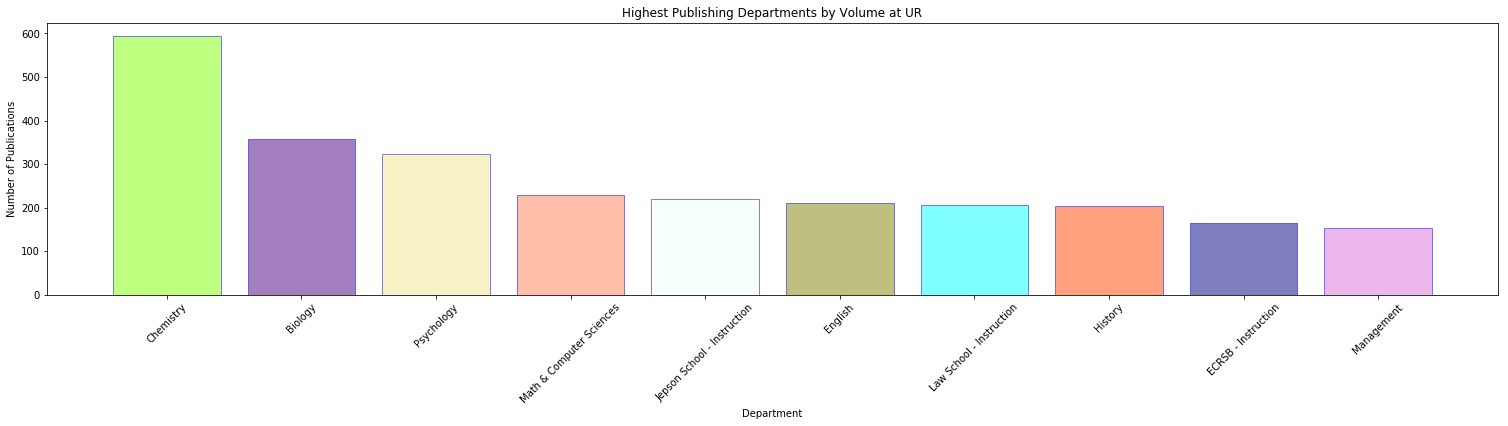

In [49]:
# Plots Top 10 publishing departments on a bar graph
plt.rcParams["figure.figsize"]=[26,5]
x_axis = department10_full.index
y_axis = department10_full["Total Author Publications"]
plt.label = department10_full["Total Author Publications"]
plt.bar(x_axis, y_axis, alpha=0.5, color = ("chartreuse", "indigo", "khaki", "coral", "azure", "olive", "aqua", "orangered", "navy", "orchid"), align="center", edgecolor='blue')
plt.title("Highest Publishing Departments by Volume at UR")
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.ylabel("Number of Publications")

    
# plt.savefig("Highest Publishing Departments by Volume at UR.png", bbox_inches = "tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

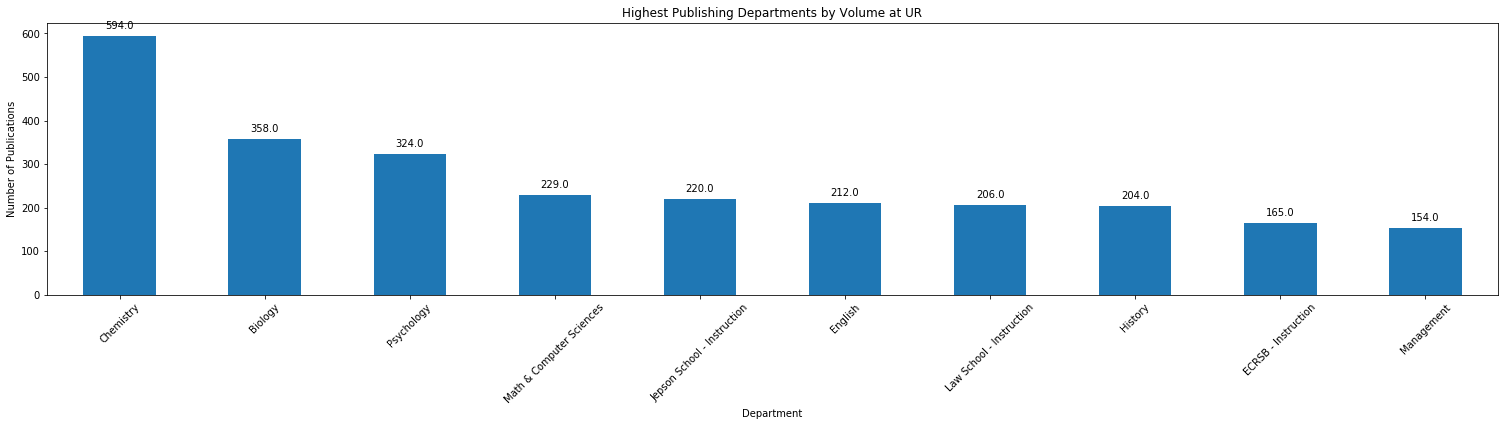

In [53]:
# Trying to label the 
plt.figure(figsize=[26,5])
y_labels = department10_full["Total Author Publications"]
ax = y_labels.plot(kind="bar")
x_labels = department10_full.index
colors = ["chartreuse", "indigo", "khaki", "coral", "azure", "olive", "aqua", "orangered", "navy", "orchid"]

# ax = plt.bar(x_axis, y_axis, alpha=0.5, color = ("chartreuse", "indigo", "khaki", "coral", "azure", "olive", "aqua", "orangered", "navy", "orchid"), align="center", edgecolor='blue')
plt.title("Highest Publishing Departments by Volume at UR")
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.ylabel("Number of Publications")

rects = ax.patches

# When colors are added in below -- it breaks the code -- so it's commented out for now

# for i in ax.patches:
#     alpha=0.5, 
#     color = colors[i] 
#     align="center", 
#     edgecolor='blue'

# Make some labels.
labels = [department10_full["Total Author Publications"] for i in x_labels]

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("Highest Publishing Departments by Volume at UR.png", bbox_inches = "tight")
plt.show

# Project Overview ~ Summary Response - Findings:


## How prolific are UR faculty in journal scholarship?

#### As I explain in more detail below, this isn't a clear answer as we looked at one database: Web of Science and it's STEM-heavy, so while it retrieved 4,708 publications, this could not be considered inclusive as it only included journals indexed within WofS. 
    
#### Plots that identify journal totals and range of titles are Bar Graph and Pie Chart for Journal Count Top 10 Titles and Top Publications by Year.
    

## What journals do they publish in ~ how many different journals and articles are published?
    
#### We first plotted all of the journals that faculty published in and this proved to be an ugly graph -- so we focused on top 10 journals as in many cases, there is a wide range of journals with only a few publications, but the following plots help to identify the most frequent journals where faculty publish: Bar Graph and Pie Chart for Journal Count Top 10 Titles, Top Publications by Year. As we note throughout, this number is only as accurate as the journals included within WofS, so the titles are STEM heavy and exclude any journals not indexed in WofS.

#### Plots: Bar Graph and Pie Chart for Journal Count Top 10 Titles, Top Publications by Year, 

## What authors (departments) publish the most?
    
#### From our results, Chemistry is the most "productive" department by total number of publications, but even this number is suspect as it didn't include Kristine's publications as she and her colleagues often list students as first authors, so in our statistics, her research would be left off from some of the results.
    
#### The plots that help visualize this information are Top 10 Authors: By first author and department, Overall Top Authors: Author and Department
    
## Who & what do these counts miss?
   
#### How many articles are counted is not a clear-cut process and the numbers and visuals can be read an interpreted differently depending on what is being counted. Web of Science is a STEM-heavy database, so it isn't inclusive of Humanities and Social Sciences journals.  While CrossRef is more inclusive of disciplines, the majority of its fields are optional, so while DOI is included, we found author affiliation isn't consistent, so neither of the sources we used could be identified as "all" inclusive of UR authors.
    
#### There isn't a distinction in our results in the early steps by faculty or staff authors (that is a classification category by HR), so in the journals, all publication authors are considered equal, but in the second merge of UR Directory information, only faculty by HR distinction was included, so library and staff authors were excluded.  We also didn't distinguish between research articles, review essays, or book reviews, so an author, such as Maxwell, who appears to be the most prolific actually wrote only book reviews, so if these numbers were looked at as a measure for tenure and promotion for example, they could provide misleading information.




